In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import cv2
import  os
import matplotlib.pyplot as plt 
import numpy as np 


In [68]:
img_array = cv2.imread("training/0/PrivateTest_10131363.jpg")


In [69]:
img_array.shape

(48, 48, 3)

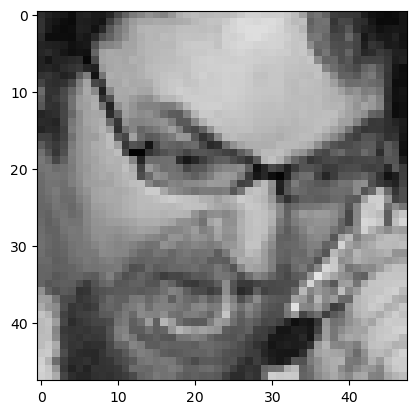

In [70]:
plt.imshow(img_array)

In [71]:
Datadirectory = "training/"

In [72]:
classes = ["0","1","2","3","4","5","6"]

In [75]:
def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory, category)  # Path to each class folder
        class_num = int(category)  # Use folder name as label

        # Check if the category path exists
        if not os.path.exists(path):
            print(f"Category folder not found: {path}")
            continue

        # Loop through all images in the category folder
        for img in os.listdir(path):
            img_path = os.path.join(path, img)

            # Check for valid image formats
            valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
            if not img.lower().endswith(valid_extensions):
                print(f"Skipping non-image file: {img_path}")
                continue

            # Read the image
            img_array = cv2.imread(img_path)

            # Check if the image is loaded properly
            if img_array is None:
                print(f"Unable to read image: {img_path}")
                continue

            # Resize the image to desired size
            img_array = cv2.resize(img_array, (img_size, img_size))

            # Append the image and its label to training data
            training_Data.append([img_array, class_num])

    print(f"Loaded {len(training_Data)} images successfully!")

      

### We are chainging the size of our image from 48.48 to 224.224 because we are going to train our model into mobilenetV2(pre trained model)
### which accepts 224*224 img size

<function matplotlib.pyplot.show(close=None, block=None)>

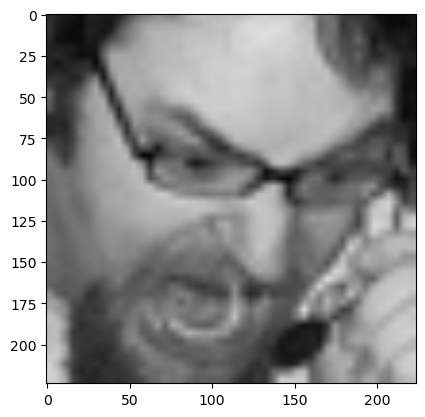

In [130]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

In [77]:
new_array.size

150528

In [85]:
import os

# Check if 'training' folder exists
Datadirectory = os.path.join(os.getcwd(), "training")
print(f"Path to training folder: {Datadirectory}")

if os.path.exists(Datadirectory):
    print(" Training folder found!")
    print(f"Contents: {os.listdir(Datadirectory)}")
else:
    print(" Training folder not found. Check the path!")


Path to training folder: C:\Users\adity\training
 Training folder found!
Contents: ['.ipynb_checkpoints', '0', '1', '2', '3', '4', '5', '6']


In [86]:
# Check files inside each category folder
classes = ['0', '1', '2', '3', '4', '5', '6']

for category in classes:
    path = os.path.join(Datadirectory, category)
    if os.path.exists(path):
        files = os.listdir(path)
        print(f"📂 Folder '{category}' contains {len(files)} files.")
        print(f"First 5 files: {files[:5]}")  # Show first 5 files
    else:
        print(f"❌ Folder '{category}' not found. Check the folder names.")


📂 Folder '0' contains 261 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_10131363.jpg', 'PrivateTest_10304478.jpg', 'PrivateTest_1054527.jpg', 'PrivateTest_10590091.jpg']
📂 Folder '1' contains 113 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_11895083.jpg', 'PrivateTest_19671520.jpg', 'PrivateTest_21629266.jpg', 'PrivateTest_22382996.jpg']
📂 Folder '2' contains 273 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_10153550.jpg', 'PrivateTest_10254684.jpg', 'PrivateTest_10306709.jpg', 'PrivateTest_10555537.jpg']
📂 Folder '3' contains 417 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_10077120.jpg', 'PrivateTest_10470092.jpg', 'PrivateTest_10513598.jpg', 'PrivateTest_10516065.jpg']
📂 Folder '4' contains 233 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_10086748.jpg', 'PrivateTest_10767287.jpg', 'PrivateTest_11123843.jpg', 'PrivateTest_11164800.jpg']
📂 Folder '5' contains 305 files.
First 5 files: ['.ipynb_checkpoints', 'PrivateTest_10

# Read all the images and convert them into in array

In [93]:
import cv2
import os
import numpy as np

# Define your dataset directory correctly
Datadirectory = os.path.join(os.getcwd(), "training")  # Path to training folder

# Define the classes (folder names)
classes = ['0', '1', '2', '3', '4', '5', '6']

# To store data and labels
training_Data = []

# Define image size (resize if needed)
img_size = 224  # Or any size you prefer


def create_training_Data():
    for category in classes:
        # Create path to each category folder
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)  # Get index as label

        # Check if the category path exists
        if not os.path.exists(path):
            print(f"❌ Directory not found: {path}")
            continue

        # Loop through all images in the category folder
        for img in os.listdir(path):
            img_path = os.path.join(path, img)

            # Skip .ipynb_checkpoints and invalid file types
            if img == ".ipynb_checkpoints":
                continue

            # Check for valid image formats
            valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
            if not img.lower().endswith(valid_extensions):
                print(f"⚠️ Skipping non-image file: {img_path}")
                continue

            # Read the image
            img_array = cv2.imread(img_path)

            # Check if the image is read properly
            if img_array is None:
                print(f"❌ Unable to read image: {img_path}")
                continue

            # Resize the image to the desired size
            img_array = cv2.resize(img_array, (img_size, img_size))

            # Append the image and its label to training_Data
            training_Data.append([img_array, class_num])
            print(f"✅ Loaded image: {img_path}")

    print(f"🎉 Loaded {len(training_Data)} images successfully!")




In [94]:
create_training_Data()


✅ Loaded image: C:\Users\adity\training\0\PrivateTest_10131363.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_10304478.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_1054527.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_10590091.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_1109992.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_11296953.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12000629.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12008383.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12191716.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_1221822.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12403575.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12766285.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12846357.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_1290484.jpg
✅ Loaded image: C:\Users\adity\training\0\PrivateTest_12912780.jpg

# we are just deplying using training and deploying real time web cam show

In [95]:
print(len(training_Data))

1824


In [96]:
import random
random.shuffle(training_Data)

## my deep learning project should be robust that why we want to make it roboust

In [98]:
X = []  # Data features
y = []  # Labels

# Loop through your training data
for features, label in training_Data:
    X.append(features)
    y.append(label)

# Make sure img_size is correctly defined
img_size = 224  # Example size, update as needed

# Convert X to a numpy array and reshape correctly
X = np.array(X).reshape(-1, img_size, img_size, 3)  # 4D array: (num_images, height, width, channels)

# Convert y to a numpy array for easier processing
y = np.array(y)


In [99]:
X.shape

(1824, 224, 224, 3)

In [101]:
# Normalize the data
X =X/255.0; # normalizing  the data

In [102]:
y[100]


1

In [105]:
Y = np.array(y) 

In [106]:
y.shape

(1824,)

# Deep learning model and training  models 

In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [114]:
import tensorflow as tf

# Correct path using tf directly
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [117]:
 model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape    ┃   Param # ┃ Connected to     ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ input_layer        │ (None, 224,     │         0 │ -                │
│ (InputLayer)       │ 224, 3)         │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ Conv1 (Conv2D)     │ (None, 112,     │       864 │ input_layer[0][… │
│                    │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ bn_Conv1           │ (None, 112,     │       128 │ Conv1[0][0]      │
│ (BatchNormalizati… │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ Conv1_relu (ReLU)  │ (None, 112,     │         0 │ bn_Conv1[0][0]   │
│                    │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ expanded_conv_dep… │ (None, 112,     │       288 │ Conv1_relu[0][0] │
│ (DepthwiseConv2D)  │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ expanded_conv_dep… │ (None, 112,     │       128 │ expanded_conv_d… │
│ (BatchNormalizati… │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ expanded_conv_dep… │ (None, 112,     │         0 │ expanded_conv_d… │
│ (ReLU)             │ 112, 32)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ expanded_conv_pro… │ (None, 112,     │       512 │ expanded_conv_d… │
│ (Conv2D)           │ 112, 16)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ expanded_conv_pro… │ (None, 112,     │        64 │ expanded_conv_p… │
│ (BatchNormalizati… │ 112, 16)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_expand     │ (None, 112,     │     1,536 │ expanded_conv_p… │
│ (Conv2D)           │ 112, 96)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_expand_BN  │ (None, 112,     │       384 │ block_1_expand[… │
│ (BatchNormalizati… │ 112, 96)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_expand_re… │ (None, 112,     │         0 │ block_1_expand_… │
│ (ReLU)             │ 112, 96)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_pad        │ (None, 113,     │         0 │ block_1_expand_… │
│ (ZeroPadding2D)    │ 113, 96)        │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_depthwise  │ (None, 56, 56,  │       864 │ block_1_pad[0][… │
│ (DepthwiseConv2D)  │ 96)             │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_depthwise… │ (None, 56, 56,  │       384 │ block_1_depthwi… │
│ (BatchNormalizati… │ 96)             │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_depthwise… │ (None, 56, 56,  │         0 │ block_1_depthwi… │
│ (ReLU)             │ 96)             │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_project    │ (None, 56, 56,  │     2,304 │ block_1_depthwi… │
│ (Conv2D)           │ 24)             │           │                  │
├────────────────────┼─────────────────┼───────────┼──────────────────┤
│ block_1_project_BN │ (None, 56, 56,  │        96 │ block_1_project… │
│ (BatchNormalizati… │ 24)             │

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Transfer Learning - Tuning , weights will start from last checkpoint

In [119]:
 base_input = model.layers[0].input

In [120]:
base_output = model.layers[-2].output

In [122]:
base_output

<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_152>

In [121]:
final_output = layers.Dense(128)(base_output) #Adding new layer after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #Activation Function 
final_output= layers.Dense(64)(final_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation= 'softmax')(final_output) ## My clasees ar sev

In [123]:
final_output

<KerasTensor shape=(None, 7, 7, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>

In [125]:
new_model = keras.Model(inputs = base_output , outputs= final_output)

In [126]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                 ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ keras_tensor_152CLONE        │ (None, 7, 7, 1280)    │            0 │
│ (InputLayer)                 │                       │              │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                │ (None, 7, 7, 128)     │      163,968 │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ activation (Activation)      │ (None, 7, 7, 128)     │            0 │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)              │ (None, 7, 7, 64)      │        8,256 │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)              │ (None, 7, 7, 7)       │          455 │
└──────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 172,679 (674.53 KB)

 Trainable params: 172,679 (674.53 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the new model
new_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Corrects the shape mismatch
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

# Compile the model
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the summary to ensure it's correct
new_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                 ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224         │ (None, 7, 7, 1280)    │    2,257,984 │
│ (Functional)                 │                       │              │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ global_average_pooling2d     │ (None, 1280)          │            0 │
│ (GlobalAveragePooling2D)     │                       │              │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)              │ (None, 128)           │      163,968 │
├──────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)              │ (None, 7)             │          903 │
└──────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [137]:
X.shape  # Should be (num_samples, 224, 224, 3)


(1824, 224, 224, 3)

In [138]:
print(Y[:5])  # Output should be something like [0, 1, 2, 3, 4]


[0 0 2 3 4]


In [139]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"✅ Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"✅ Validation data shape: {X_val.shape}, Labels: {y_val.shape}")


✅ Training data shape: (1459, 224, 224, 3), Labels: (1459,)
✅ Validation data shape: (365, 224, 224, 3), Labels: (365,)


In [142]:
# Start training
history = new_model.fit(
    X_train, y_train,
    epochs=30,                # Increase epochs if needed
    batch_size=32,            # Batch size (you can modify)
    validation_data=(X_val, y_val)  # Include validation data
)

print("🎉 Training complete!")


Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9893 - loss: 0.1219 - val_accuracy: 0.3699 - val_loss: 2.4016
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9951 - loss: 0.0970 - val_accuracy: 0.3616 - val_loss: 2.4307
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9994 - loss: 0.0922 - val_accuracy: 0.3644 - val_loss: 2.4473
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.9974 - loss: 0.0760 - val_accuracy: 0.3507 - val_loss: 2.5835
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.9968 - loss: 0.0713 - val_accuracy: 0.3753 - val_loss: 2.5130
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9994 - loss: 0.0596 - val_accuracy: 0.3616 - val_loss: 2.5668
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9994 - loss: 0.0542 - val_accuracy: 0.3699 - val_loss: 2.6083
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9983 - loss: 0.0468 - val_accuracy: 0.

In [143]:
# Evaluate on validation data
val_loss, val_acc = new_model.evaluate(X_val, y_val)
print(f"✅ Validation Accuracy: {val_acc * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.3624 - loss: 3.0750
✅ Validation Accuracy: 36.16%


In [144]:
new_model.save('mobilenetv2_trained_model.h5')
print("✅ Model saved as 'mobilenetv2_trained_model.h5'")


✅ Model saved as 'mobilenetv2_trained_model.h5'


In [145]:
pip install opencv-python numpy tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Load your trained model (if you need to classify faces later)
# model = load_model('mobilenetv2_trained_model.h5')


In [42]:
frame = cv2.imread("happy_boy.jpeg")

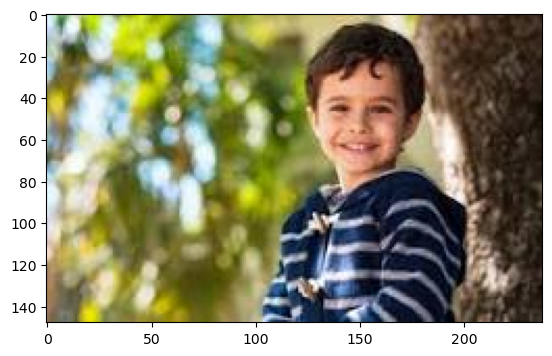

In [43]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

In [44]:
frame.shape

(148, 238, 3)

In [45]:

# Load the pre-trained emotion detection model
model_path = 'mobilenetv2_trained_model.h5'  # Change this if you have your own model
model = load_model(model_path)

# Define emotion labels (adjust according to your model)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [46]:
 gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [47]:
gray.shape

(148, 238)

In [48]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Process each detected face
for x, y, w, h in faces:
    # Region of interest (ROI) in grayscale and color
    roi_gray = gray[y:y + h, x:x + w]  # Grayscale face
    roi_color = frame[y:y + h, x:x + w]  # Original color face

    # Draw a rectangle around the face
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    facess = face_cascade.detectMultiScale(roi_gray, 1.1, 4)



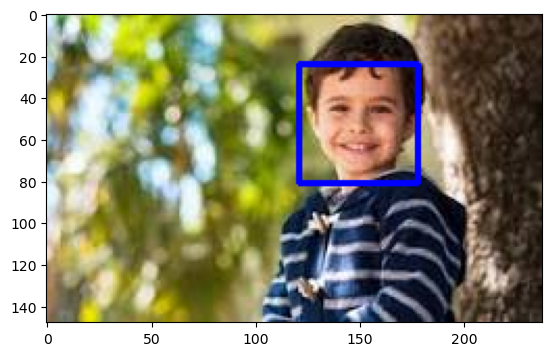

In [49]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

In [50]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in faces:
    # Get the region of interest (face)
    face_roi = frame[y:y + h, x:x + w]

    # Resize the face to 224x224
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension
    final_image = final_image / 255.0  # Normalize


In [51]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 with pre-trained weights
new_model = MobileNetV2(weights='imagenet')


In [52]:
# Import required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [53]:
from tensorflow.keras.models import load_model

# Load your trained MobileNetV2 model
new_model = load_model('mobilenetv2_trained_model.h5')


In [55]:
# Ensure you have face_cascade loaded properly
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read and preprocess the frame (image)
frame = cv2.imread('happy_boy.jpeg')  # Replace with your image path
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Check if any face is detected
if len(faces) == 0:
    print("No face detected!")
else:
    for x, y, w, h in faces:
        # Get the region of interest (face)
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face to 224x224 as required by MobileNetV2
        final_image = cv2.resize(face_roi, (224, 224))

        # Expand dimensions to match model input shape
        final_image = np.expand_dims(final_image, axis=0)

        # Normalize pixel values to the range [0, 1]
        final_image = final_image / 255.0

        print("Face processed successfully!")



Face processed successfully!


In [56]:
# Make predictions
predictions = new_model.predict(final_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Define emotion labels based on your class mapping
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Display the predicted emotion
predicted_emotion = emotion_labels[predicted_class]
print(f"Predicted Emotion: {predicted_emotion}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Emotion: Happy


In [58]:
predictions[0]

array([3.0649586e-02, 1.4296857e-02, 3.1048842e-04, 9.4259518e-01,
       4.0285868e-04, 1.1686790e-02, 5.8200949e-05], dtype=float32)

In [62]:
np.argmax(predictions)

3

In [63]:
# Import required libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = "mobilenetv2_trained_model.h5"  # Replace with your model path
model = load_model(model_path)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define emotion labels (Update if necessary)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot open camera!")
    exit()

# Monitor panel setup
monitor_width = 300
monitor_height = 500
monitor_bg = np.ones((monitor_height, monitor_width, 3), dtype=np.uint8) * 255  # White background

# Real-time video loop
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Frame not captured!")
        break
    
    # Get frame height and width
    height, width, _ = frame.shape

    # Create a copy of the original frame to modify
    display_frame = np.copy(frame)

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar Cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Clear monitor for each frame
    monitor_panel = np.ones((monitor_height, monitor_width, 3), dtype=np.uint8) * 255

    # Check if faces are detected
    if len(faces) == 0:
        cv2.putText(monitor_panel, "No face detected!", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    else:
        # Process each detected face
        for i, (x, y, w, h) in enumerate(faces):
            # Draw a rectangle around the face
            cv2.rectangle(display_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Get region of interest (face)
            face_roi = frame[y:y + h, x:x + w]

            # Resize face to 224x224 for model input
            final_image = cv2.resize(face_roi, (224, 224))

            # Expand dimensions to match model input shape (1, 224, 224, 3)
            final_image = np.expand_dims(final_image, axis=0)

            # Normalize pixel values to [0, 1]
            final_image = final_image / 255.0

            # Make prediction using the model
            predictions = model.predict(final_image)

            # Get the predicted class with the highest probability
            predicted_class = np.argmax(predictions)
            predicted_emotion = emotion_labels[predicted_class]

            # Get confidence score
            confidence = np.max(predictions) * 100

            # Display prediction on monitor panel
            label = f"{i+1}. {predicted_emotion} ({confidence:.2f}%)"
            cv2.putText(monitor_panel, label, (10, 50 + i * 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Display predicted emotion near the face in the frame
            cv2.putText(display_frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Resize the monitor panel to match the frame height dynamically
    monitor_panel_resized = cv2.resize(monitor_panel, (monitor_width, height))

    # Combine original frame with the monitor panel on the right side
    combined_frame = np.hstack((display_frame, monitor_panel_resized))

    # Display the combined frame with the monitor panel
    cv2.imshow('Real-Time Mood Detection with Monitor Panel', combined_frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━